In [171]:
import mysql.connector as sql
import pandas as pd
import datetime as dt
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import matplotlib.pyplot as plt
import math

In [104]:
db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')
pens = pd.read_sql('SELECT * FROM Pens', con=db_connection)
pens['note'] = pens['note'].astype('category')
pens['registered'].replace(0, np.nan, inplace=True)
pens['registered'] = pd.to_datetime(pens['registered'], unit='s')
pens['lastmodified'].replace(0, np.nan, inplace=True)
pens['lastmodified'] = pd.to_datetime(pens['lastmodified'], unit='s')
pens['disabled'].replace(0, np.nan, inplace=True)
pens['disabled'] = pd.to_datetime(pens['disabled'], unit='s')
pens['retired'].replace(0, np.nan, inplace=True)
pens['retired'] = pd.to_datetime(pens['retired'], unit='s')

pensActivity = pd.read_sql('SELECT * FROM PensActivity', con=db_connection)
pensActivity['created'] = pd.to_datetime(pensActivity['created'], unit='s')
pensActivity['lastmodified'] = pd.to_datetime(pensActivity['lastmodified'], unit='s')
pensActivity['notes'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
pensActivity['notes'] = pensActivity['notes'].astype('category')
pensActivity.sort_values(by='created', inplace=True) 

pensCheckouts = pd.read_sql('SELECT * FROM PensCheckouts', con=db_connection)
pensCheckouts['start'] = pd.to_datetime(pensCheckouts['start'], unit='s')
pensCheckouts['start'].replace(0, np.nan, inplace=True)
pensCheckouts['end'].replace(0, np.nan, inplace=True)
pensCheckouts['end'] = pd.to_datetime(pensCheckouts['end'], unit='s')
pensCheckouts['start_ip'].replace(0, np.nan, inplace=True)
pensCheckouts['end_ip'].replace(0, np.nan, inplace=True)
pensCheckouts['start_ip'] = pensCheckouts['start_ip'].astype('category')
pensCheckouts['end_ip'] = pensCheckouts['end_ip'].astype('category')

pensRegisters = pd.read_sql('SELECT * FROM PensRegisters', con=db_connection)
pensRegisters['created'] = pd.to_datetime(pensRegisters['created'], unit='s')
pensRegisters['registers'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
pensRegisters['registers'].replace('None', np.NaN, regex=True, inplace=True)

In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option("max_colwidth", 300)

In [232]:
pensRegisters

,id,pen_id,visit_id,registers,created
0,0,1523211,1652511,"{""company"":""0x0"",""low_battery_level_reached_since_last_reset"":0,""nfc_loops"":16,""p2p_counter_after_low_battery_level_reached"":378,""p2p_counter_before_low_battery_level_reached"":0,""p2p_life_counter"":378,""p2p_test_normal_mode"":1,""pen_uid"":""595F836F1C001900"",""tag_counter_after_low_battery_level_reac...",2015-03-07 03:44:22
1,793417,8,793401,"{""vibra_on"":1,""tag_counter_after_low_battery_level_reached"":0,""p2p_life_counter"":378,""tag_life_counter"":29,""pen_id"":""NaN"",""vibra_duration"":115973,""company"":""0x0"",""tag_counter_before_low_battery_level_reached"":29,""nfc_loops"":16,""p2p_test_normal_mode"":1,""low_battery_level_reached_since_last_reset""...",2014-10-23 15:45:29
2,796509,6,796261,"{""vibra_on"":1,""tag_counter_after_low_battery_level_reached"":0,""p2p_life_counter"":378,""tag_life_counter"":29,""pen_id"":""NaN"",""vibra_duration"":115973,""company"":""0x0"",""tag_counter_before_low_battery_level_reached"":29,""nfc_loops"":16,""p2p_test_normal_mode"":1,""low_battery_level_reached_since_last_reset""...",2014-11-03 21:35:45
3,797847,9,797837,"{""vibra_on"":1,""tag_counter_after_low_battery_level_reached"":0,""p2p_life_counter"":378,""tag_life_counter"":29,""pen_id"":""NaN"",""vibra_duration"":115973,""company"":""0x0"",""tag_counter_before_low_battery_level_reached"":29,""nfc_loops"":16,""p2p_test_normal_mode"":1,""low_battery_level_reached_since_last_reset""...",2014-11-04 20:33:11
4,798025,7,797915,"{""vibra_on"":1,""tag_counter_after_low_battery_level_reached"":0,""p2p_life_counter"":378,""tag_life_counter"":29,""pen_id"":""NaN"",""vibra_duration"":115973,""company"":""0x0"",""tag_counter_before_low_battery_level_reached"":29,""nfc_loops"":16,""p2p_test_normal_mode"":1,""low_battery_level_reached_since_last_reset""...",2014-11-04 23:37:59
...,...,...,...,...,...
891113,132777689,1524473,132777683,NaN,2020-07-02 20:22:39
891114,132794707,1524473,132794701,NaN,2020-07-06 17:42:37
891115,132806725,1524473,132806719,NaN,2020-07-09 13:12:38
891116,132806733,1524473,132806727,NaN,2020-07-09 13:16:52


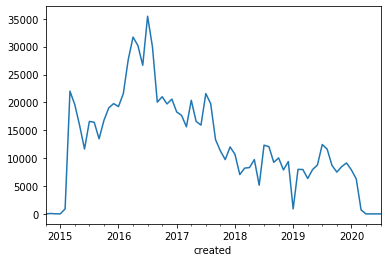

In [10]:
register_by_month = pensRegisters['created'].groupby(pensRegisters.created.dt.to_period("M")).agg('count')
register_by_month.plot()

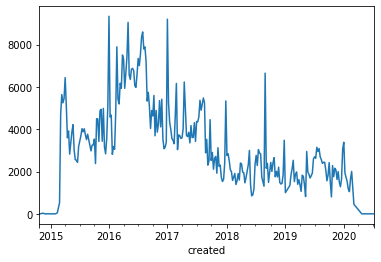

In [11]:
register_by_week = pensRegisters['created'].groupby(pensRegisters.created.dt.to_period("W")).agg('count')
register_by_week.plot()

In [13]:
pensRegisters['created'].groupby(pensRegisters.created.dt.to_period("M")).agg('count').nlargest(10)

created
2016-07    35452
2016-04    31712
2016-05    30202
2016-08    29969
2016-03    27622
2016-06    26663
2015-03    22021
2016-02    21589
2017-07    21586
2016-10    21016
Freq: M, Name: created, dtype: int64

In [15]:
pensRegisters['created'].groupby(pensRegisters.created.dt.to_period("D")).agg('count').nlargest(10)

created
2018-08-30    4635
2016-01-03    2138
2016-03-12    2100
2015-03-08    2053
2016-04-23    2032
2017-09-23    2030
2015-04-03    1997
2016-09-24    1969
2016-07-23    1920
2016-01-17    1790
Freq: D, Name: created, dtype: int64

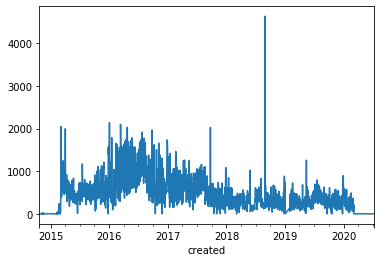

In [17]:
register_by_day = pensRegisters['created'].groupby(pensRegisters.created.dt.to_period("D")).agg('count')
register_by_day.plot()

In [18]:
pensRegisters.count()

id           891118
pen_id       891118
visit_id     891118
registers    891060
created      891118
dtype: int64

In [210]:
pensRegisters

,id,pen_id,visit_id,registers,created
0,0,1523211,1652511,"{""company"":""0x0"",""low_battery_level_reached_since_last_reset"":0,""nfc_loops"":16,""p2p_counter_after_low_battery_level_reached"":378,""p2p_counter_before_low_battery_level_reached"":0,""p2p_life_counter"":378,""p2p_test_normal_mode"":1,""pen_uid"":""595F836F1C001900"",""tag_counter_after_low_battery_level_reac...",2015-03-07 03:44:22
1,793417,8,793401,"{""vibra_on"":1,""tag_counter_after_low_battery_level_reached"":0,""p2p_life_counter"":378,""tag_life_counter"":29,""pen_id"":""NaN"",""vibra_duration"":115973,""company"":""0x0"",""tag_counter_before_low_battery_level_reached"":29,""nfc_loops"":16,""p2p_test_normal_mode"":1,""low_battery_level_reached_since_last_reset""...",2014-10-23 15:45:29
2,796509,6,796261,"{""vibra_on"":1,""tag_counter_after_low_battery_level_reached"":0,""p2p_life_counter"":378,""tag_life_counter"":29,""pen_id"":""NaN"",""vibra_duration"":115973,""company"":""0x0"",""tag_counter_before_low_battery_level_reached"":29,""nfc_loops"":16,""p2p_test_normal_mode"":1,""low_battery_level_reached_since_last_reset""...",2014-11-03 21:35:45
3,797847,9,797837,"{""vibra_on"":1,""tag_counter_after_low_battery_level_reached"":0,""p2p_life_counter"":378,""tag_life_counter"":29,""pen_id"":""NaN"",""vibra_duration"":115973,""company"":""0x0"",""tag_counter_before_low_battery_level_reached"":29,""nfc_loops"":16,""p2p_test_normal_mode"":1,""low_battery_level_reached_since_last_reset""...",2014-11-04 20:33:11
4,798025,7,797915,"{""vibra_on"":1,""tag_counter_after_low_battery_level_reached"":0,""p2p_life_counter"":378,""tag_life_counter"":29,""pen_id"":""NaN"",""vibra_duration"":115973,""company"":""0x0"",""tag_counter_before_low_battery_level_reached"":29,""nfc_loops"":16,""p2p_test_normal_mode"":1,""low_battery_level_reached_since_last_reset""...",2014-11-04 23:37:59
...,...,...,...,...,...
891113,132777689,1524473,132777683,NaN,2020-07-02 20:22:39
891114,132794707,1524473,132794701,NaN,2020-07-06 17:42:37
891115,132806725,1524473,132806719,NaN,2020-07-09 13:12:38
891116,132806733,1524473,132806727,NaN,2020-07-09 13:16:52


In [19]:
pensCheckouts

,id,pen_id,visit_id,start,end,start_ip,end_ip
0,68762351,8,793401,2014-10-23 15:36:51,2014-10-25 00:44:42,NaN,NaN
1,68762353,3,793449,2014-10-23 16:25:42,2014-10-25 00:44:42,NaN,NaN
2,68764535,9,793527,2014-10-24 02:04:59,2014-10-25 00:44:42,NaN,NaN
3,68764585,2,793571,2014-10-24 15:05:23,2014-10-27 17:53:29,NaN,NaN
4,68764655,7,793681,2014-10-25 00:02:19,2014-10-27 17:53:29,NaN,NaN
...,...,...,...,...,...,...,...
556332,132777685,1520099,132777683,2020-07-02 20:22:28,2020-07-02 20:22:44,1.198075e+09,1.198075e+09
556333,132794703,1520099,132794701,2020-07-06 17:42:18,2020-07-06 17:43:00,1.198075e+09,1.198075e+09
556334,132806721,1520099,132806719,2020-07-09 13:12:28,2020-07-09 13:12:46,1.198075e+09,1.198075e+09
556335,132806729,1520099,132806727,2020-07-09 13:16:41,2020-07-09 13:17:00,1.198075e+09,1.198075e+09


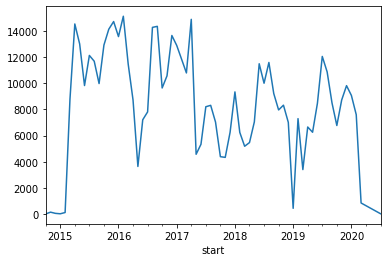

In [23]:
checkout_by_month = pensCheckouts['start'].groupby(pensCheckouts.start.dt.to_period("M")).agg('count')
checkout_by_month.plot()

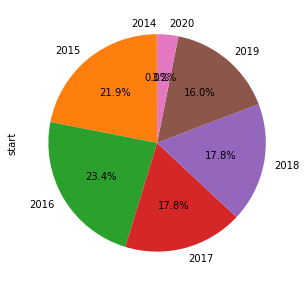

In [35]:
checkout_by_year = pensCheckouts['start'].groupby(pensCheckouts.start.dt.to_period("Y")).agg('count')
checkout_by_year.plot.pie(y='start', figsize=(5, 5),autopct='%1.1f%%', startangle=90)

In [30]:
pensCheckouts_index = pensCheckouts.set_index(['start'])
pensCheckouts_index.loc['01-01-2019': '07-31-2019'].count()
#this gives info for Adam's question

id          44563
pen_id      44563
visit_id    44563
end         44563
start_ip    44563
end_ip      42132
dtype: int64

In [112]:
pensCheckouts['end'].dropna(inplace=True)
pensCheckouts['start'].dropna(inplace=True)

In [114]:
pensCheckouts[['start', 'end']]

,start,end
0,2014-10-23 15:36:51,2014-10-25 00:44:42
1,2014-10-23 16:25:42,2014-10-25 00:44:42
2,2014-10-24 02:04:59,2014-10-25 00:44:42
3,2014-10-24 15:05:23,2014-10-27 17:53:29
4,2014-10-25 00:02:19,2014-10-27 17:53:29
...,...,...
556332,2020-07-02 20:22:28,2020-07-02 20:22:44
556333,2020-07-06 17:42:18,2020-07-06 17:43:00
556334,2020-07-09 13:12:28,2020-07-09 13:12:46
556335,2020-07-09 13:16:41,2020-07-09 13:17:00


In [119]:
pensCheckouts['time_spent'] = pensCheckouts['end'] - pensCheckouts['start']
mask1 = total < '1 days'
less_day = pensCheckouts[mask]
less_day

,id,pen_id,visit_id,start,end,start_ip,end_ip,time_spent
2,68764535,9,793527,2014-10-24 02:04:59,2014-10-25 00:44:42,NaN,NaN,22:39:43
12,68765453,7,795317,2014-10-29 23:32:39,2014-10-29 23:42:20,NaN,NaN,00:09:41
13,68765467,8,795341,2014-10-29 23:40:54,2014-10-29 23:42:10,NaN,NaN,00:01:16
15,68765513,1,795405,2014-10-30 00:13:50,2014-10-30 00:15:08,NaN,NaN,00:01:18
16,68765521,1,795417,2014-10-30 00:16:53,2014-10-30 00:21:26,NaN,NaN,00:04:33
...,...,...,...,...,...,...,...,...
556332,132777685,1520099,132777683,2020-07-02 20:22:28,2020-07-02 20:22:44,1.198075e+09,1.198075e+09,00:00:16
556333,132794703,1520099,132794701,2020-07-06 17:42:18,2020-07-06 17:43:00,1.198075e+09,1.198075e+09,00:00:42
556334,132806721,1520099,132806719,2020-07-09 13:12:28,2020-07-09 13:12:46,1.198075e+09,1.198075e+09,00:00:18
556335,132806729,1520099,132806727,2020-07-09 13:16:41,2020-07-09 13:17:00,1.198075e+09,1.198075e+09,00:00:19


In [123]:
pd.set_option('display.max_rows', 2000)
less_day.sort_values(['time_spent']).head(2000)

,id,pen_id,visit_id,start,end,start_ip,end_ip,time_spent
41,68774043,3,814815,2014-11-12 17:40:42,2014-11-12 17:40:42,NaN,NaN,00:00:00
190,68802389,1509677,1509689,2014-12-15 15:07:56,2014-12-15 15:07:56,NaN,NaN,00:00:00
64,68775359,3,905243,2014-11-13 20:20:51,2014-11-13 20:20:51,NaN,NaN,00:00:00
63,68775357,3,904949,2014-11-13 20:15:55,2014-11-13 20:15:55,NaN,NaN,00:00:00
62,68775355,3,904839,2014-11-13 20:14:04,2014-11-13 20:14:04,NaN,NaN,00:00:00
133,68777557,987051,1050199,2014-11-19 20:04:19,2014-11-19 20:04:19,NaN,NaN,00:00:00
61,68775353,3,904639,2014-11-13 20:10:20,2014-11-13 20:10:20,NaN,NaN,00:00:00
42,68774045,3,815709,2014-11-12 17:57:15,2014-11-12 17:57:15,NaN,NaN,00:00:00
47,68775135,3,836101,2014-11-13 00:02:56,2014-11-13 00:02:56,NaN,NaN,00:00:00
52,68775333,3,890721,2014-11-13 16:58:47,2014-11-13 16:58:47,NaN,NaN,00:00:00


In [124]:
less_day["time_spent"].mean()
#this is answering Adam with goofy data of less 5 min

Timedelta('0 days 02:02:31.281114')

In [141]:
less_day['time_spent'].groupby(less_day.time_spent.dt.to_period("min")).agg('count')

AttributeError: 'TimedeltaProperties' object has no attribute 'to_period'

In [213]:
min_by_day = less_day["time_spent"].map(lambda timedelta: timedelta.total_seconds() / 60)
min_by_day = min_by_day.dropna().map(lambda seconds: math.floor(seconds))
min_by_day = min_by_day.to_frame()

In [214]:
min_by_day['count_min'] = min_by_day['time_spent'].value_counts()
min_by_day

,time_spent,count_min
2,1359,891.0
12,9,369.0
13,1,386.0
15,1,405.0
16,4,443.0
...,...,...
556332,0,NaN
556333,0,NaN
556334,0,NaN
556335,0,NaN


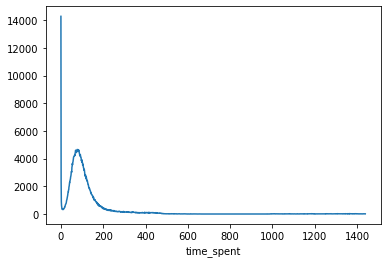

In [216]:
min_by_day.groupby('time_spent').size().plot()
#crazy number with a few seconds

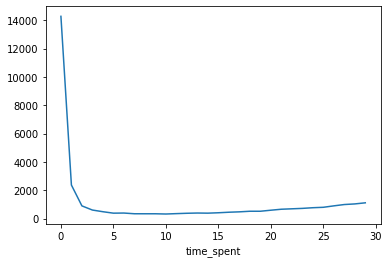

In [217]:
less_30 = min_by_day[min_by_day['time_spent'] < 30]
less_30.groupby('time_spent').size().plot()
#bunch of shity data

In [218]:
less_five = min_by_day[min_by_day['time_spent'] > 5]
less_five['time_spent'].mean()
#the average time for the whole db is about 2hours and 7 min

126.90362885266111

In [227]:
from_Jan = pensCheckouts['start'] >= '2019-01-01'
till_july = pensCheckouts['start'] < '2019-07-31'
date_range = pensCheckouts[from_Jan & till_july]

/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shirin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


119.26680797167008

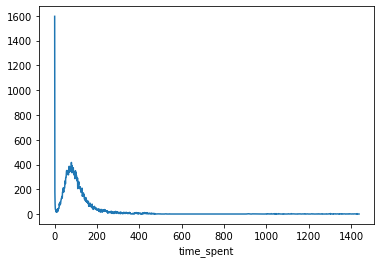

In [234]:
date_range['time_spent'] = date_range['end'] - date_range['start']
mask2 = total < '1 days'
less_day2 = date_range[mask2]
min_by_day2 = less_day2["time_spent"].map(lambda timedelta: timedelta.total_seconds() / 60)
min_by_day2 = min_by_day2.dropna().map(lambda seconds: math.floor(seconds))
min_by_day2 = min_by_day2.to_frame()
min_by_day2.groupby('time_spent').size().plot()
less_five2 = min_by_day2[min_by_day2['time_spent'] > 5]
less_five2['time_spent'].mean()

In [231]:
pensActivity

,visit_id,pen_id,fingerprint,activity,notes,status_id,created,lastmodified,time_to_process,count_items
131729,1509709,5,25d0ca6227e881c0f38c088d9f424737ec2773e1,"{""collection"":[{""record_id"":1,""record_data"":""chsdm:o:18500983"",""record_len"":16,""timestamp"":""00:00:04""},{""record_id"":1,""record_data"":""chsdm:o:18305299"",""record_len"":16,""timestamp"":""00:00:07""}],""registers"":{""vibra_on"":1,""tag_counter_after_low_battery_level_reached"":0,""p2p_life_counter"":378,""tag_li...",NaN,1,2014-12-15 15:32:19,2014-12-15 15:32:19,0,2
628374,1509661,1509681,b4737a3d142bb06f6d70dd02bd64f6a956792e59,"{""pen_uid"":""91ff826f0b001e00"",""initial_time_stamp"":""#2014-12-15T15:06:53"",""unit_id"":""ffff"",""registers"":"""",""ticket_id"":""sx6w"",""collection"":[{""record_id"":1,""record_data"":""Uchsdm:o:18797297;18796201;35460625;35474659;68245681;18740273;51685081;68268445;52027703;18797267;68268299"",""record_len"":110,""...",Insufficient permissions for object at index 1,0,2014-12-15 15:52:19,2014-12-15 15:52:19,0,7
473963,1509705,1509673,8810c7196f7f12237868251ff4b34ffe1e2a6d99,"{""pen_uid"":""90ff826f0a001d00"",""initial_time_stamp"":""#2014-12-15T15:08:32"",""unit_id"":""ffff"",""registers"":"""",""ticket_id"":""5cmh"",""collection"":[{""record_id"":1,""record_data"":""Uchsdm:o:68731001;68244063;68731009;68268059;35460835;18705931;68245549;35456853"",""record_len"":83,""timestamp"":""0:34:27""},{""reco...",Insufficient permissions for object at index 3,0,2014-12-15 15:56:09,2014-12-15 15:56:09,0,5
771570,1509665,1509677,dd7a1ecaf59145b51fb13110598a99be48cc88ff,"{""pen_uid"":""91ff826f08001b00"",""initial_time_stamp"":""#2014-12-15T15:07:53"",""unit_id"":""ffff"",""registers"":"""",""ticket_id"":""cwzn"",""collection"":[{""record_id"":1,""record_data"":""Uchsdm:o:68268457;18731063;68731007;18797477;51685175;51589113;18620635;68268575;68246011"",""record_len"":92,""timestamp"":""0:34:44...",Insufficient permissions for object at index 1,0,2014-12-15 15:56:30,2014-12-15 18:11:49,0,6
760275,1509687,1509683,da4055c2974155441bc26679ea37d9d57421a4fc,"{""pen_uid"":""91ff826f22001600"",""initial_time_stamp"":""#2014-12-15T15:07:23"",""unit_id"":""ffff"",""registers"":"""",""ticket_id"":""nzs2"",""collection"":[{""record_id"":1,""record_data"":""Uchsdm:o:68731001;68244063;68731009;68268059;35460835;18705931;68245549;35456853"",""record_len"":83,""timestamp"":""0:34:41""},{""reco...",Insufficient permissions for object at index 2,0,2014-12-15 15:58:11,2014-12-15 18:10:29,0,6
...,...,...,...,...,...,...,...,...,...,...
494124,132777683,1524473,8de20189e64f86c4f892b98ca7d30077b00b3874,"{""ticket_id"":""tzctj"",""registers"":""None"",""collection"":[{""record_id"":1,""record_data"":""Uchsdm:o:18165899"",""record_len"":20,""timestamp"":""0:0:38""}],""unit_id"":""ffff"",""initial_time_stamp"":""#2019-12-16T21:45:46"",""pen_uid"":""90ff826f04002300""}",NaN,1,2020-07-02 20:22:39,2020-07-02 20:22:39,161,1
676664,132794701,1524473,c24003e782909cd4a8385fd84970943237aa605b,"{""ticket_id"":""gz65"",""registers"":""None"",""collection"":[{""record_id"":1,""record_data"":""Uchsdm:o:18165899"",""record_len"":20,""timestamp"":""0:0:38""}],""unit_id"":""ffff"",""initial_time_stamp"":""#2019-12-16T21:45:46"",""pen_uid"":""90ff826f04002300""}",NaN,1,2020-07-06 17:42:37,2020-07-06 17:42:37,159,1
283113,132806719,1524473,513e424fc16895f97ae6e70e9bb74f9a58c59229,"{""ticket_id"":""56bs6"",""registers"":""None"",""collection"":[{""record_id"":1,""record_data"":""Uchsdm:o:18165899"",""record_len"":20,""timestamp"":""0:0:38""}],""unit_id"":""ffff"",""initial_time_stamp"":""#2019-12-16T21:45:46"",""pen_uid"":""90ff826f04002300""}",NaN,1,2020-07-09 13:12:38,2020-07-09 13:12:38,172,1
595596,132806727,1524473,ab224c85d1194f9136c2903b41c6f56a34d7875b,"{""ticket_id"":""cvszd"",""registers"":""None"",""collection"":[{""record_id"":1,""record_data"":""Uchsdm:o:18165899"",""record_len"":20,""timestamp"":""0:0:38""}],""unit_id"":""ffff"",""initial_time_stamp"":""#